### 1

Добрый король Роберт Баратеон приехал в замок Винтерфелл, чтобы встретиться со своим старым другом лордом Эддардом Старком, хорошо выпить и вспомнить былые деньки. На приветственном пиру король заметил, какие в семье Старков все высокие, и загорелся выяснить, не выродился ли род Баратеонов, сравнив рост Старков с ростом принца Джоффри, чему тот не очень-то был и рад. Подняв бумаги с помощью замкового мейстера, король выяснил следующие значения роста Старков:

- лорд Эддард Старк: 192 см
- леди Кейтилин Старк: 178 см
- Бенджен Старк: 188 см
- Робб Старк: 180 см
- Санса Старк: 170 см
- Бран Старк: 165 см
- Арья Старк: 145 см
- Рикон Старк: 139 см
- Джон Сноу: 180 см

Учитывая то, что рост принца Джоффри составляет 169 см, помогите королю выяснить:
1) Выше ли принц Джоффри, чем *в среднем* семья Старков?
2) Выше ли принц Джоффри, чем *средний* Старк (медиана их ростов)?
3) Выше ли принц Джоффри, чем *самый частый рост* в роду Старков (мода их ростов)?
3) Изменится ли картина, если в ряд Старков обманом и хитростью затесался дядя принца карлик Тирион Ланнистер, чей рост составляет 115 см?

#### Решение 1:

In [1]:
import numpy as np
from scipy.stats import mode

def king_report(starks, joff):
    starks_mean = starks.mean().round(2)
    starks_median = np.median(starks)
    starks_mode = mode(starks)[0][0]
    print(f"Среднее: {starks_mean} Медиана: {starks_median} Мода: {starks_mode} Джоффри: {joff}")

starks = np.array([192, 178, 188, 180, 170, 165, 145, 139, 180])
joffrey = 169
king_report(starks, joffrey)

Среднее: 170.78 Медиана: 178.0 Мода: 180 Джоффри: 169


Тут Джоффри ловить нечего, конечно. Но вдруг хитрый Тирион выручит принца?

In [2]:
tyrion = 115
starks = np.append(starks, tyrion)
king_report(starks, joffrey)

Среднее: 165.2 Медиана: 174.0 Мода: 180 Джоффри: 169


И вмешательство дяди выручило принца в среднем, но очевидно не выручило в отношении медианы и моды. Хотя бы маленький мерзавец сохранил лицо...

### 2

Молодой викинг Торвальд Волосатый Палец очень сильно хочет, чтобы ярл взял его в следующий набег. Ежедневно он встает на рассвете, умывается ледяной водой из колодца и без устали кидает свой топор в нарисованную на стене длинного дома мишень. Распределение попаданий Торвальда в мишень описывается функцией *плотности* вероятности экспоненциального распределения $f(x)=e^{-x}$, где $x>=0$ - расстояние в пальцах от центра мишени до точки попадания.

Поскольку ярл не берет в хирд неумелых воинов, он требует, чтобы 90% попаданий топора находились в радиусе не больше 2 пальцев от центра.

Возьмут ли Торвальда в следующий набег?

#### Математическое решение 2:

Для того, чтобы ответить на вопрос задачи, необходимо найти точку, в пределах которой лежит 90% попаданий Торвальда.
Это та самая точка, которая отсекает площадь под графиком функции распределения, равную 0,9. Поскольку площадь под графиком функции в заданных пределах равна интегралу Римана от этой функции в этих пределах, мы обозначим нужную нам точку за $z$ и пишем:

$0,9 = \int_0^z e^{-x}dx = F(z) - F(0) $ по формуле Ньютона-Лейбница, где F(x) - первообразная функции.

Наша первообразная равна $F(x) = \int e^{-x}dx = -e^{-x} + C$, поэтому перепишем предыдущее выражение как:

$0,9 = -e^{-z} - C + e^{0} + C = 1 - e^{-z}$

$e^{-z} = 0,1$

$z = -ln(0,1) = ln(10) = 2,303$ пальца, что больше условия, выдвинутого конунгом.

Поэтому Торвальду придется еще потренироваться, чтобы улучшить функцию плотности.



#### Решение 2 на Python:

Для такой имплементации нужно очень хорошо понимать как устроены непрерывные распределения в scipy.stats и что делают основные функции распределения:
CDF (функция распределения), PDF (функция плотности распределения), PPF(функция, обратная CDF) и SF(1 - CDF).

In [3]:
from scipy.stats import expon

torvald = expon()
result = torvald.ppf(0.9)
print(result)

2.302585092994046


### 3

У веселого молочника Джастаса Уолкера на ферме праздник - ему удалось вывести поросят редкой субарктической породы. Счастливый фермер методично взвесил все 15 поросят, получив следующие значения их весов: [8.8,  9.7,  9.8, 12.3, 11.6, 12.6,  8.4, 10.4,  9.9,  7.5, 11.9, 7 , 10.4, 12.3,  9.9]. И как умному человеку, к тому же прочитавшему недавно учебник Лагутина по математической статистике, ему стало очень интересно, сможет ли он предсказать средний вес вообще любого поросенка этой редкой субарктической породы?

Джастас предполагает, что этот вес равен 10. Вместе с ним проверьте, есть ли у Джастаса основания отвергнуть нулевую гипотезу о равенстве генерального среднего совокупности весов поросят субарктической породы числу 10, если пороговый уровень значимости гипотезы равен 0.1?

#### Решение 3.1:

Сформулируем статистический вывод: нам нужно проверить нулевую гипотезу о равенстве среднего генеральной совокупности, из которой взята наша выборка, числу 10. Так как выборка маленькая (15), здесь следует использовать распределение Стьюдента в предположении, что генеральная совокупность распределена нормально.

Вычислим нужные нам значения:

In [4]:
import numpy as np
from scipy.stats import t

mu_hyp = 10 # гипотетическое генеральное среднее

In [5]:
samp = np.array([8.8, 9.7, 9.8, 12.3, 11.6, 12.6, 8.4, 10.4, 9.9, 7.5, 11.9, 7 , 10.4, 12.3, 9.9]) # выборка
x_mean = samp.mean() # выборочное среднее
x_sd = samp.std(ddof=1) # выборочное стандартное отклонение ВНИМАНИЕ НА ПАРАМЕТР DDOF: DELTA DEGREES OF FREEDOM
n = samp.shape[0] # размер выборки
print(x_mean, x_sd, n)

10.166666666666668 1.748741043749828 15


Теперь найдем стандартное отклонение средних se по формуле $s_e = \frac{s_d}{\sqrt{n}}$:

In [6]:
se = x_sd/np.sqrt(n)
se

0.4515229959514973

И теперь, собственно, наша задача найти значение t-статистики для заданных выборочного среднего x_mean, генерального среднего my_hyp и найденного se:

In [7]:
z = (x_mean - mu_hyp) / se
z

0.3691211038220769

Что мы нашли? Мы нашли пороговое значение t-статистики для нашей выборки и предполагаемого среднего, "дальше" которого по модулю нам нельзя попадать. И все, что осталось - вычислить эту плохую вероятность попасть туда (уровень значимости гипотезы). Для этого возьмем распределение Стьюдента:

In [8]:
degrees_of_freedom = n - 1 # число степеней свободы ВЫБОРКИ равно ее мощности минус единица
tstat = t(degrees_of_freedom) # распределение с заданным числом степеней свободы

И вычислим площадь под графиком функции плотности распределения слева от значения z и справа от значения -z, так как распределение Стьюдента симметрично - это и будет уровень значимости, который мы ищем:

In [9]:
p = (1 - tstat.cdf(z)) + tstat.cdf(-z)
# или, используя survival function
# p = tstat.sf(z) + (1 - tstat.sf(-z))
p

0.7175602068525668

In [10]:
p < 0.1 # cравниваем с заданным пороговым значением

False

Следовательно, у нас с Джастасом нет оснований отвергать нулевую гипотезу о том, что средний поросенок всей субарктической породы весит 10 кг.

#### Решение 2:

Для тех, кто срезает углы и будет юзать готовые имплементации t-теста:

In [11]:
from scipy.stats import ttest_1samp

In [12]:
tt = ttest_1samp(samp, mu_hyp)
tt.pvalue

0.7175602068525668

То же значение, те же выводы.

### 4

Ученые-археологи, исследовавшие гробницы древних русов, обнаружили на саркофаге воеводы Буреслава Редедича нацарапанное на языке рептилоидов матерное слово из семнадцати символов. Технология, которой слово было нанесено на сверхтвердый базальт, по-прежнему за пределами понимания современных физики и материаловедения, и единственное, что ученые смогли - измерить глубину каждой буквы в камне. Ужас охватил ученых, когда они увидели результаты этих измерений. Компьютер безжалостно распечатал эти невероятные цифры: [ 0.894,  0.745, -1.633,  1.315,  2.458,  0.462,  1.046, -0.04 , 0.121,  0.031, -0.491, -0.329,  0.881, -1.516,  0.056, -0.105, 0.178], и единственный вопрос, который звучал в затхлых залах древних гробниц - это нормально вообще, по всем стандартам, хоть на десятую долю?

#### Решение 4.1:

Очевидная задача на применение нужного критерия согласия данной выборки с генеральной совокупностью, имеющей стандартное нормальное распределение, с предельным уровнем значимости, равным 0,1. 

В этом роуте нас ждет построение эмпирической функции распределения и затем ручное применение критерия Колмогорова-Смирнова.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstwo
%matplotlib inline

In [14]:
samp_4 = np.array(
    [ 0.894,  0.745, -1.633,  1.315,  2.458,  0.462,  1.046, -0.04 , 0.121,  0.031, -0.491, -0.329,  0.881, -1.516,  0.056, -0.105, 0.178]
)
samp_4.sort() # отсортируем выборку в вариационный ряд
samp_4

array([-1.633, -1.516, -0.491, -0.329, -0.105, -0.04 ,  0.031,  0.056,
        0.121,  0.178,  0.462,  0.745,  0.881,  0.894,  1.046,  1.315,
        2.458])

Для построения эмпирической функции распределения нужно сделать вот что: разбить размах выборки на участки с помощью набора точек и затем сосчитать, сколько из значений выборки попадают в полуинтервал от минус бесконечности до каждой точки. Таким образом, левее минимума выборки кумулятивная вероятность будет равна 0, а правее максимума выборки - 1, что полностью соответствует требованию к функции распределения; только вид она будет иметь ступенчатый. Мы разобьем размах выборки на 1000 точек:

In [15]:
ls = np.linspace(samp_4.min(), samp_4.max(), 1000)

emp_F = np.array([np.sum(samp_4 <= i) for i in ls]) / samp_4.shape[0] 

Теперь рассчитаем теоретические значения кумулятивной вероятности, используя стандартную нормальную функцию распределения:

In [16]:
theo_F = norm(0,1).cdf(ls)

Посмотрим на графики функций:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9492\756466660.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


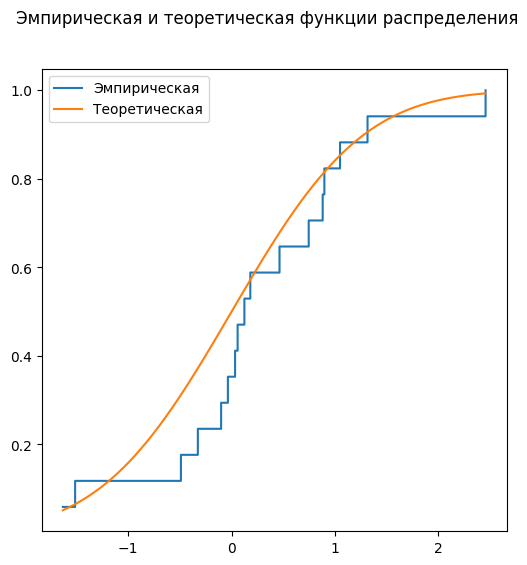

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle('Эмпирическая и теоретическая функции распределения')
ax.step(ls, emp_F, label='Эмпирическая', where='post')
ax.plot(ls, theo_F, label='Теоретическая')
ax.legend()
fig.show();

Теперь вычислим значение статистики критерия, как максимум (на самом деле супремум, точная верхняя грань) модулей разности между эмпирической и теоретической функции распределения:

In [18]:
D = np.max(np.abs(emp_F - theo_F))
D

0.22268370216673505

Последний шаг - воспользоваться распределением Колмогорова для того, чтобы вычислить уровень значимости для найденного значения статистики. Это несложно, памятуя, что у критерия правосторонняя критическая область:

In [19]:
ks = kstwo(samp_4.shape[0])
p = 1 - ks.cdf(D)
p

0.3190767838979188

In [20]:
p < 0.1

False

Следовательно, у нас нет оснований отвергнуть нулевую гипотезу о согласии выборки со стандартным нормальным распределением на уровне значимости 0.1

На всякий случай взглянем на QQ-график:

In [21]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm as stm_norm

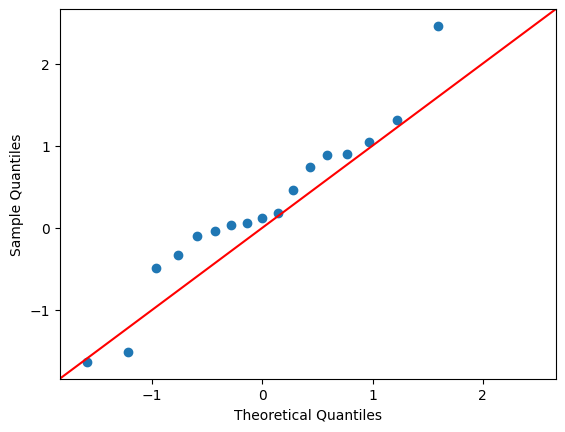

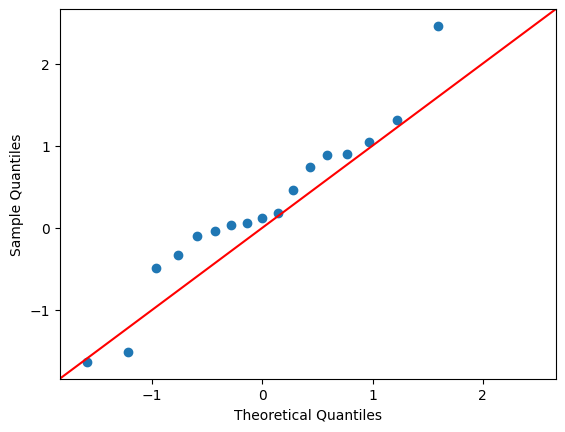

In [22]:
qqplot(samp_4, stm_norm, line='45')

Ну нормально.

#### Решение 4.2:

Имплементация критерия Колмогорова-Смирнова из scipy:

In [23]:
from scipy.stats import kstest

In [24]:
ks2 = kstest(samp_4, norm(0, 1).cdf)
ks2

KstestResult(statistic=0.22289378671323656, pvalue=0.3180193836364317)

Легкое расхождение с предыдущим результатом определяется шагом интерполяции в том - например, взять 2000 точек.

#### Решение 4.3:

Имплементация критерия Шапиро-Уилка из scipy.stats:


In [25]:
from scipy.stats import shapiro
shapiro(samp_4)

ShapiroResult(statistic=0.9573008418083191, pvalue=0.5814324021339417)

Проверка по критерию Шапиро-Уилка тоже говорит об отсуствии основания отвергнуть нулевую гипотезу о согласии.

Поэтому - да, это нормально с уровнем значимости в десятую долю.

### 5

Юный пилот Нагатэ Таникадзе всю жизнь жил с дедушкой-отшельником на глубинных уровнях огромного космического корабля "Сидония" и не знал, какие изменения претерпело человечество, столетия убегая от космических монстров-гауна. В поисках еды он выбрался-таки на обитаемые палубы и реальность от души шарахнула его по шаблону, когда он увидел комнату с табличкой "Зал фотосинтеза для гермафродитов". Во-первых, в целях экономии еды люди генетически модифицировали себя и научились фотосинтезу; во-вторых, появился третий пол в дополнение к мужскому и женскому. Но самое большое потрясение его вызвали настольные игры, в которых использовался пятигранный кубик в виде треугольной призмы. На робкое заявление Нагатэ, что этот кубик нечестный, и квадратные грани выпадают каждая на 1/18 чаще, чем треугольные, гермафродиты только похлопали глазами и сказали "не может быть!".

Нагатэ лишь прищурился в ответ и бросил злосчастный кубик 360 раз, получив такие результаты:
- 1 (квадратная грань): 77
- 2 (квадратная грань): 82
- 3 (квадратная грань): 80
- 4 (треугольная грань): 63
- 5 (треугольная грань): 58

Гермафродиты немедленно загомонили, что это случайность, но дедушка учил Нагатэ многим нужным пилоту вещам, в том числе и математической статистике.

Получится ли у него доказать свою правоту, если он уверен в своих знаниях на 99%?

#### Решение 5.1:

Очевидная задача на применение критерия хи-квадрат.

Самое первое, что нужно сделать - аккуратно вычислить ожидаемое (теоретическое) распределение. По оговорке Нагатэ можно сказать, что квадратная грань выпадает с вероятностью на 1/18 больше, чем треугольная. Тогда, обозначив вероятность выпадения треугольной грани за x, запишем, помня, что сумма всех вероятностей равна 1:

$ P_{1(sq)} + P_{2(sq)} + P_{3(sq)} + P_{4(tr)} + P_{5(tr)} = 1$

$ (x + 1/18) + (x + 1/18) + (x + 1/18) + x + x = 1 $

$ 5x + 3/18 = 1 $

$ 5x = 15/18 = 5/6$

$x = 1/6 $

Таким образом, ожидаемые вероятности запишем как [2/9, 2/9, 2/9, 1/6, 1/6]

In [26]:
import numpy as np

E_pr = np.array([2/9, 2/9, 2/9, 1/6, 1/6]) # далее домножим на число бросков кубика, чтобы получить ожидаемые значения
E_ent = E_pr * 360
E_ent

array([80., 80., 80., 60., 60.])

Полученные значения:

In [27]:
O_ent = np.array([77, 82, 80, 63, 58])

Вычислим значение статистики Хи-квадрат для этого случая по формуле $\chi^2 = \sum \frac {(O-E)^2}{E}$:

In [28]:
chis = np.sum((O_ent - E_ent) ** 2 / E_ent)
chis

0.37916666666666665

Теперь воспользуемся распределением Хи-квадрат из scipy.stats c числом степеней свободы 4 (на 1 меньше, чем количество граней на кубике):

In [29]:
from scipy.stats import chi2

ch = chi2(len(O_ent)- 1)
p = 1 - ch.cdf(chis)
p

0.9841467788270921

In [30]:
p < 0.01

False

Таким образом, нет статистических оснований отвергнуть нулевую гипотезу о том, что кубик нечестный. Вот вам, гермафродиты!

#### Решение 5.2:

Имплементация того же самого теста из scipy.stats:

In [31]:
from scipy.stats import chisquare

chi2_test = chisquare(O_ent, E_ent)
chi2_test

Power_divergenceResult(statistic=0.37916666666666665, pvalue=0.9841467788270921)

### Bonus

Охраннику Сергею, работающему в супермаркете "Магнит", очень хочется курить. Весь день было не найти даже жалких 3 минут, эти чертовы покупатели постоянно приходили и приходили. От скуки и однообразия Сергей даже посчитал, что в среднем в магазин приходит 4 человека в минуту. Потом ему понравилось считать, и он внезапно обнаружил, что это развлекает. С помощью гугла и зверской интуиции, впитанной с портвейном молодости в пригородах Ставрополя, Сергей решил, что он сбегает покурить, если вероятность того, что пока он курит, в магазин зайдет не больше 5 человек (за ними последит тележечник Фархотжон), не будет больше 5%. 

Сможет ли Сергей позволить себе приятную дымную паузу среди суетного рабочего дня?

#### Решение Bonus:

Это, очевидно, задача на распределение Пуассона (ключевые слова - среднее число событий в единицу времени).
Основной параметр распределения - 4, время - 3 минуты, события - не больше 5 человек.

Запишем основную формулу распределения со временем и $\lambda=4$:

$P_t(k)=\frac{(\lambda t)^k * e^{-\lambda t}}{k!}=\frac{(4t)^k * e^{-4t}}{k!}$

Теперь что есть вероятность того, что зайдет не больше пяти человек? Это:

$P_3(k<=5) = P_3(0) + P_3(1) + P_3(2) + P_3(3) + P_3(4) + P_3(5)$

In [32]:
import numpy as np
from math import factorial

def p(lam, t, k):
    return ((lam * t) ** k) * np.exp(-lam * t) / factorial(k)

p(4, 3, 0) + p(4, 3, 1) + p(4, 3, 2) + p(4, 3, 3) + p(4, 3, 4) + p(4, 3, 5)

0.02034102941692837

Охранник Сергей может отлучиться покурить.